In [ ]:
import polars as pl

# Load your CSV dataset (adjust the path and file name as needed)
df = pl.read_csv("csic_database.csv")  
print("Dataset loaded successfully. Shape:", df.shape)

In [ ]:
# Display the first 5 rows
print("First 5 rows of the dataset:")
print(df.head(5))

# Print data types for each column
print("\nData types for each column:")
print(df.dtypes)

# --- Visualize the distribution of data types ---
import matplotlib.pyplot as plt

# Create a mapping of column name to its data type (as string)
col_types = {col: str(dtype) for col, dtype in zip(df.columns, df.dtypes)}

# Count occurrences of each type
type_counts = {}
for t in col_types.values():
    type_counts[t] = type_counts.get(t, 0) + 1

# Plot a bar chart for the count of each data type
plt.figure(figsize=(8, 6))
plt.bar(list(type_counts.keys()), list(type_counts.values()), color="skyblue")
plt.xlabel("Data Types")
plt.ylabel("Count of Columns")
plt.title("Count of Columns by Data Type")
plt.show()


In [ ]:
# Get overall summary statistics for the DataFrame
print("\nSummary statistics for the dataset:")
print(df.describe())

# Optionally, print summary statistics for each column
for col in df.columns:
    print(f"\nColumn: {col}")
    print(df[col].describe())
    print("-" * 30)


In [ ]:
# Calculate missing values per column
missing_counts = {col: df.filter(pl.col(col).is_null()).shape[0] for col in df.columns}

print("\nMissing values count per column:")
for col, count in missing_counts.items():
    print(f"{col}: {count}")

# --- Visualize missing values via a bar chart ---
plt.figure(figsize=(10, 6))
plt.bar(list(missing_counts.keys()), list(missing_counts.values()), color="tomato")
plt.xlabel("Columns")
plt.ylabel("Missing Value Count")
plt.title("Missing Value Count per Column")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Determine total rows and unique rows
total_rows = df.shape[0]
unique_rows = df.unique().shape[0]
duplicate_count = total_rows - unique_rows

print("\nDuplicate Rows Analysis:")
print(f"Total rows: {total_rows}")
print(f"Unique rows: {unique_rows}")
print(f"Duplicate rows found: {duplicate_count}")

# --- Visualize duplicates using a pie chart ---
labels = ['Unique Rows', 'Duplicate Rows']
sizes = [unique_rows, duplicate_count]
colors = ['lightgreen', 'lightcoral']
explode = (0, 0.1)  # Slightly "explode" the duplicate slice

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode)
plt.title("Unique vs. Duplicate Rows")
plt.axis('equal')
plt.show()


In [22]:
# For each column, print how many unique values exist. For numeric columns, you might be particularly interested.
print("\nUnique value counts for each column:")
for col in df.columns:
    unique_count = df.select(pl.col(col).n_unique()).to_series()[0]
    print(f"{col}: {unique_count} unique values")


Unique value counts for each column:
: 2 unique values
Method: 3 unique values
Accept: 2 unique values
host: 2 unique values
cookie: 61065 unique values
content-type: 2 unique values
connection: 2 unique values
lenght: 383 unique values
content: 12092 unique values
classification: 2 unique values
URL: 13498 unique values



Useless columns detected (with only one unique value):
[]


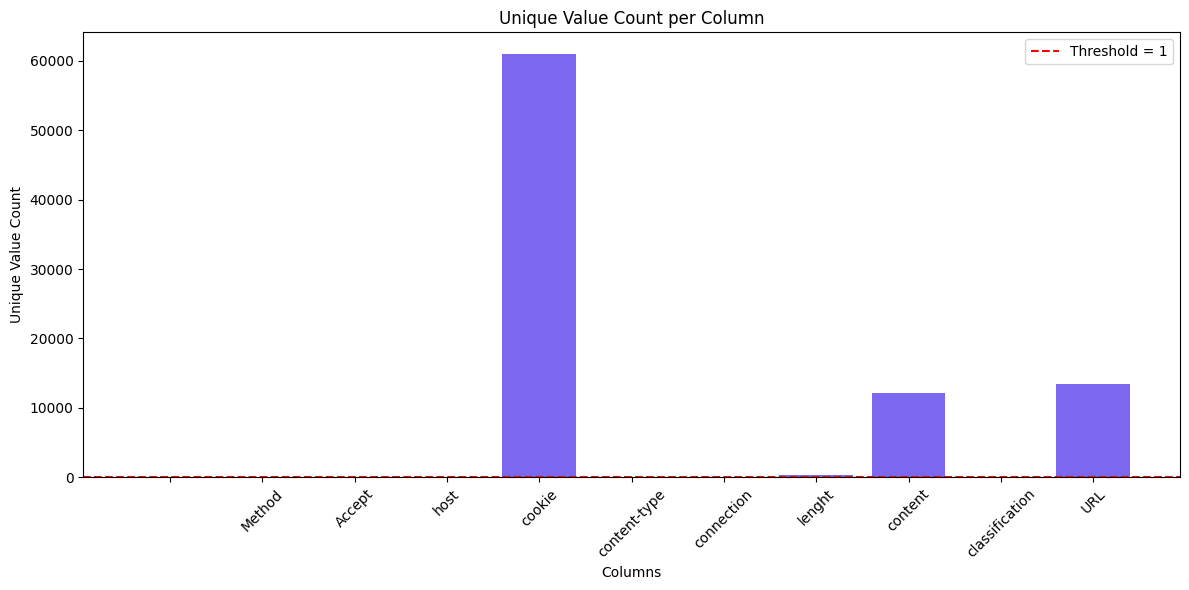

No useless columns to drop.


In [24]:
# Identify columns with only one unique value
useless_columns = []
unique_counts = {}  # For charting: store unique count for each column

for column in df.columns:
    unique_count = df.select(pl.col(column).n_unique()).to_series()[0]
    unique_counts[column] = unique_count
    if unique_count == 1:
        useless_columns.append(column)

print("\nUseless columns detected (with only one unique value):")
print(useless_columns)

# --- Visualize the unique count for each column ---
plt.figure(figsize=(12, 6))
plt.bar(list(unique_counts.keys()), list(unique_counts.values()), color='mediumslateblue')
plt.xlabel("Columns")
plt.ylabel("Unique Value Count")
plt.title("Unique Value Count per Column")
plt.xticks(rotation=45)
plt.axhline(1, color='red', linestyle='--', label="Threshold = 1")
plt.legend()
plt.tight_layout()
plt.show()

# Drop the useless columns, if any
if useless_columns:
    df = df.drop(useless_columns)
    print("Dropped the above useless columns.")
    print("New dataset shape:", df.shape)
else:
    print("No useless columns to drop.")


In [26]:
# Impute missing values: text columns receive "Unknown", numeric columns receive the column's median.
for col, dtype in zip(df.columns, df.dtypes):
    if dtype == pl.Utf8:
        df = df.with_columns([pl.col(col).fill_null("Unknown")])
    else:
        median_val = df[col].median()
        df = df.with_columns([pl.col(col).fill_null(median_val)])

print("\nMissing values have been handled (filled).")


Missing values have been handled (filled).


In [ ]:
# Recalculate missing values per column
missing_counts_recheck = {col: df.filter(pl.col(col).is_null()).shape[0] for col in df.columns}

print("\nRechecked missing values count per column:")
for col, count in missing_counts_recheck.items():
    print(f"{col}: {count}")

# --- Visualize rechecked missing values via a bar chart ---
plt.figure(figsize=(10, 6))
plt.bar(list(missing_counts_recheck.keys()), list(missing_counts_recheck.values()), color="tomato")
plt.xlabel("Columns")
plt.ylabel("Missing Value Count")
plt.title("Rechecked Missing Value Count per Column")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()